<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Final Project: Classification with Python</font></h1>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="https://#Section_1">Instructions</a></li>
    <li><a href="https://#Section_2">About the Data</a></li>
    <li><a href="https://#Section_3">Importing Data </a></li>
    <li><a href="https://#Section_4">Data Preprocessing</a> </li>
    <li><a href="https://#Section_5">One Hot Encoding </a></li>
    <li><a href="https://#Section_6">Train and Test Data Split </a></li>
    <li><a href="https://#Section_7">Train Logistic Regression, KNN, Decision Tree, SVM, and Linear Regression models and return their appropriate accuracy scores</a></li>
</a></li>
</div>
<p>Estimated Time Needed: <strong>180 min</strong></p>
</div>

<hr>


# Instructions


In this lab, classification algorithms were used to create a model based on training data and evaluate testing data using evaluation metrics.

We will use some of the algorithms:

1. Linear Regression
2. KNN
3. Decision Trees
4. Logistic Regression
5. SVM

We will evaluate our models using:

1.  Accuracy Score
2.  Jaccard Index
3.  F1-Score
4.  LogLoss
5.  Mean Absolute Error
6.  Mean Squared Error
7.  R2-Score

Finally, we will use models to generate the report at the end. 


# About The Dataset


The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)




This dataset contains observations of weather metrics for each day from 2008 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)



## **Import the required libraries**


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [19]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['numpy'])
await piplite.install (['seaborn'])


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle
%matplotlib inline

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

### Importing the Dataset


In [5]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [6]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv'

In [7]:
await download(path, "Weather_Data.csv")
filename ="Weather_Data.csv"

In [8]:
df = pd.read_csv("Weather_Data.csv")
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


### Data Preprocessing


#### One Hot Encoding


First, we need to perform one hot encoding to convert categorical variables to binary variables.


In [10]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.


In [11]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

In [35]:
categorical_features = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 6
Categorical Features:  ['Date', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [38]:
numerical_features = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
df.select_dtypes(include=['float64','int64']).columns 
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 16
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [40]:
#to check cardinality as ML algorithms can only deal with numerical data
for each_feature in categorical_features:
    print("Cardinality(no. of unique values) of {} are: {}".format(each_feature,len(df[each_feature].unique())))

Cardinality(no. of unique values) of Date are: 3271
Cardinality(no. of unique values) of WindGustDir are: 16
Cardinality(no. of unique values) of WindDir9am are: 16
Cardinality(no. of unique values) of WindDir3pm are: 16
Cardinality(no. of unique values) of RainToday are: 2
Cardinality(no. of unique values) of RainTomorrow are: 2


In [42]:
# Type conversion of Date Column to datetime type:

df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [15]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.771005,0.013995,0.569316,-0.063475,0.127792,-0.298040,0.225905,0.053946,0.273269,-0.391654,-0.353334,0.241248,0.164028,0.939307,0.753147
MaxTemp,0.771005,1.000000,-0.139306,0.510334,0.327422,0.073184,-0.349382,0.155542,-0.185382,-0.150741,-0.385853,-0.420375,-0.084695,-0.099217,0.858639,0.960805
Rainfall,0.013995,-0.139306,1.000000,-0.110343,-0.308962,0.149811,0.153696,0.039415,0.332636,0.305635,-0.037561,0.001780,0.245231,0.200999,-0.054297,-0.142748
Evaporation,0.569316,0.510334,-0.110343,1.000000,0.175932,0.245426,-0.077532,0.292469,-0.395651,-0.102295,-0.343581,-0.298303,-0.037051,-0.038422,0.606122,0.474599
Sunshine,-0.063475,0.327422,-0.308962,0.175932,1.000000,-0.029032,-0.058410,0.177813,-0.490631,-0.586476,-0.047789,-0.094507,-0.665014,-0.677861,0.113891,0.345528
WindGustSpeed,0.127792,0.073184,0.149811,0.245426,-0.029032,1.000000,0.256460,0.509825,-0.225613,-0.095037,-0.408876,-0.351850,0.024275,0.044016,0.159570,0.036216
WindSpeed9am,-0.298040,-0.349382,0.153696,-0.077532,-0.058410,0.256460,1.000000,0.197669,-0.189763,-0.148849,0.003737,0.091878,-0.062441,-0.018030,-0.334084,-0.351836
WindSpeed3pm,0.225905,0.155542,0.039415,0.292469,0.177813,0.509825,0.197669,1.000000,-0.288910,-0.135039,-0.333810,-0.277749,-0.050932,-0.095435,0.280009,0.136713
Humidity9am,0.053946,-0.185382,0.332636,-0.395651,-0.490631,-0.225613,-0.189763,-0.288910,1.000000,0.657933,0.262098,0.249202,0.431550,0.331062,-0.145944,-0.155192
Humidity3pm,0.273269,-0.150741,0.305635,-0.102295,-0.586476,-0.095037,-0.148849,-0.135039,0.657933,1.000000,0.151608,0.179611,0.463529,0.472248,0.131855,-0.212696


In [43]:
df[categorical_features].isnull().sum()

Date            0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [45]:
categorical_features_with_null = [feature for feature in categorical_features if df[feature].isnull().sum()] 
#which features has null value

In [46]:
# Filling the missing(Null) categorical features with most frequent value(mode)

for each_feature in categorical_features_with_null:
    mode_val = df[each_feature].mode()[0]
    df[each_feature].fillna(mode_val,inplace=True)

In [48]:
df[numerical_features].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

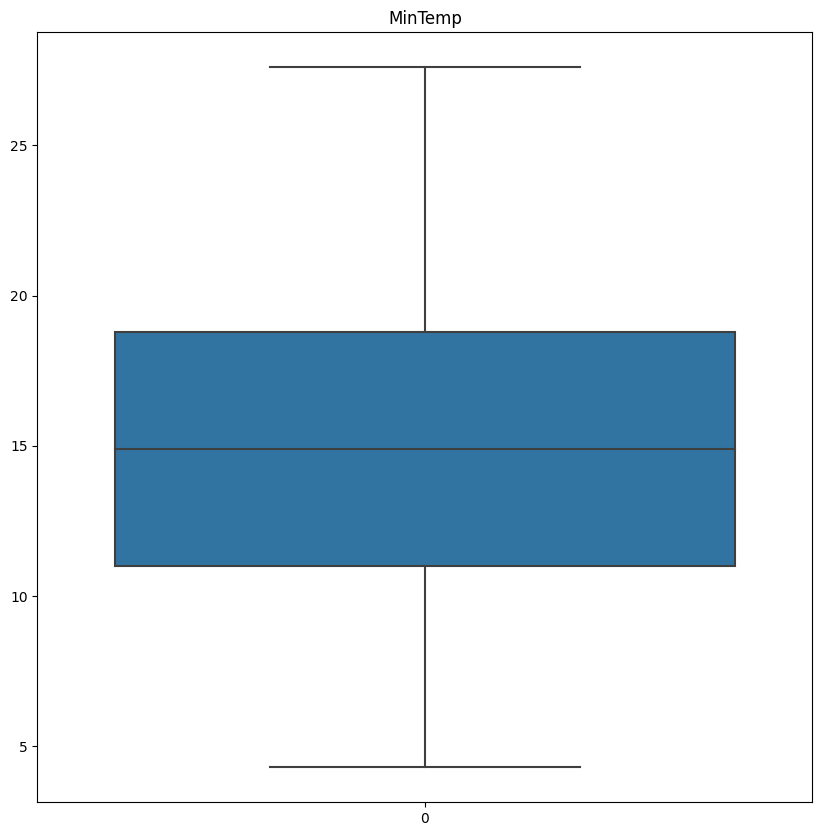

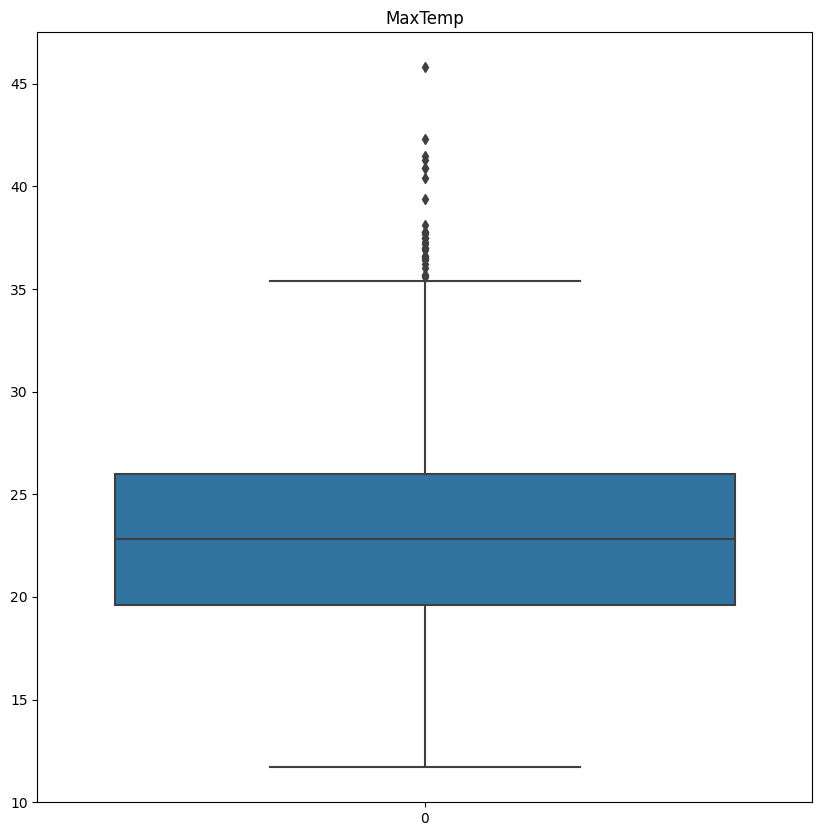

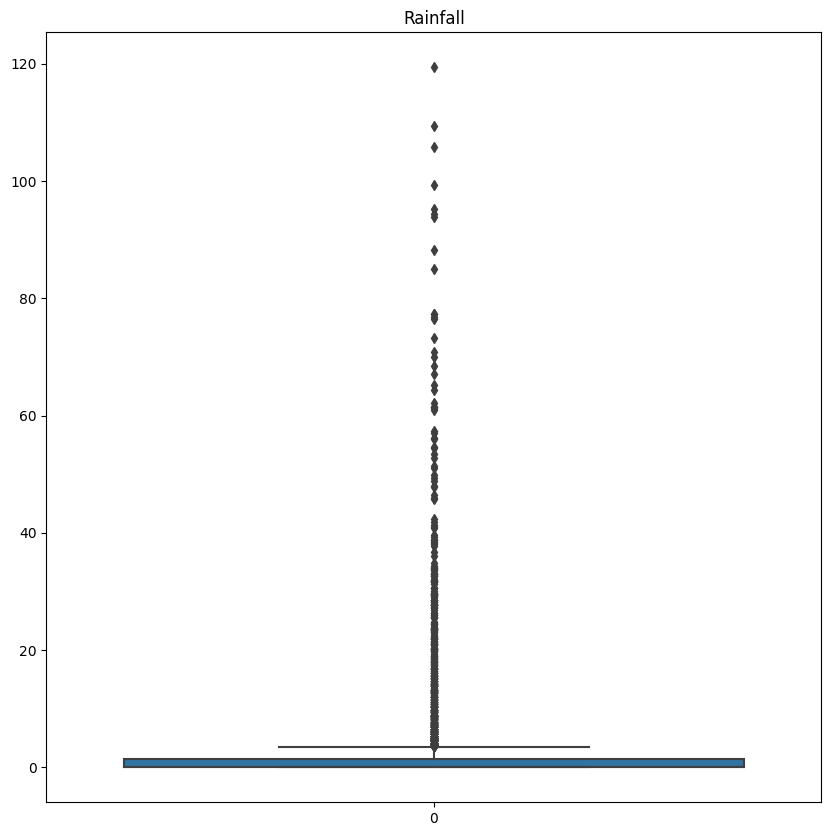

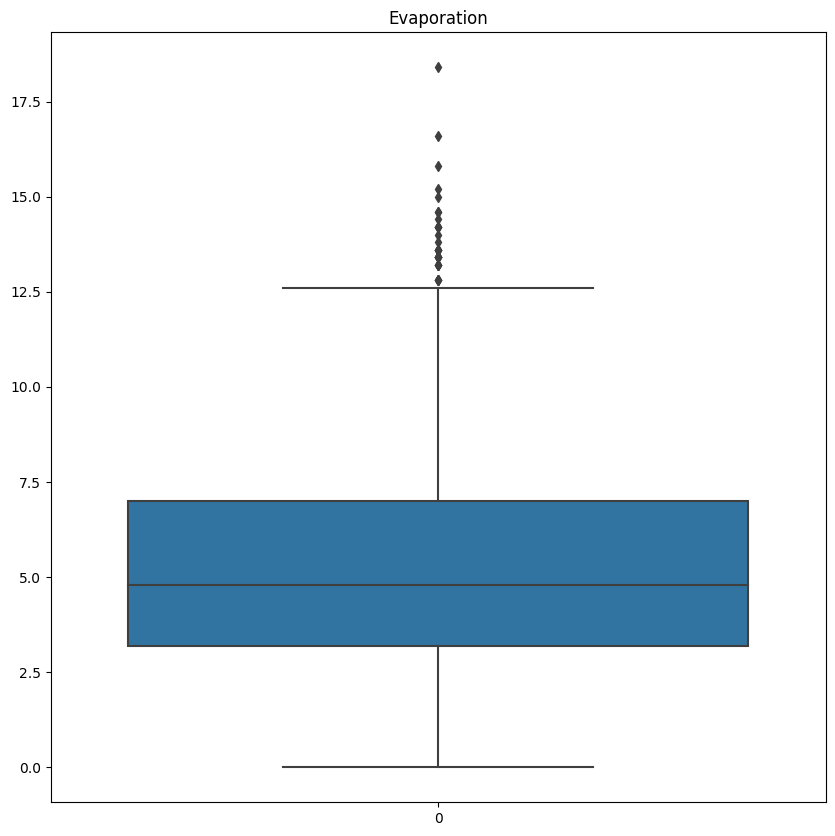

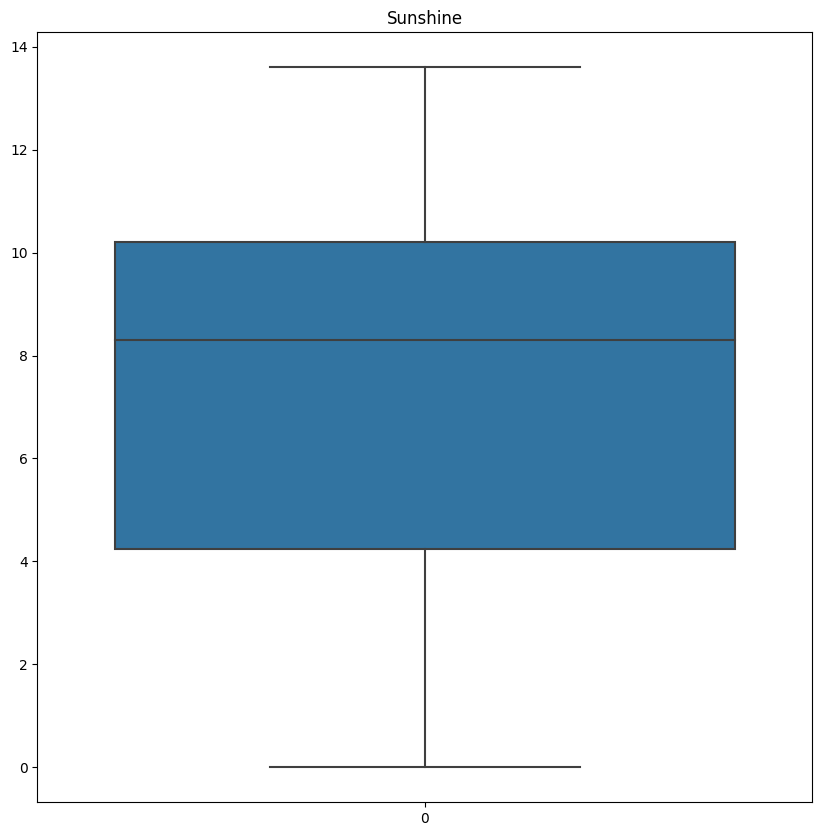

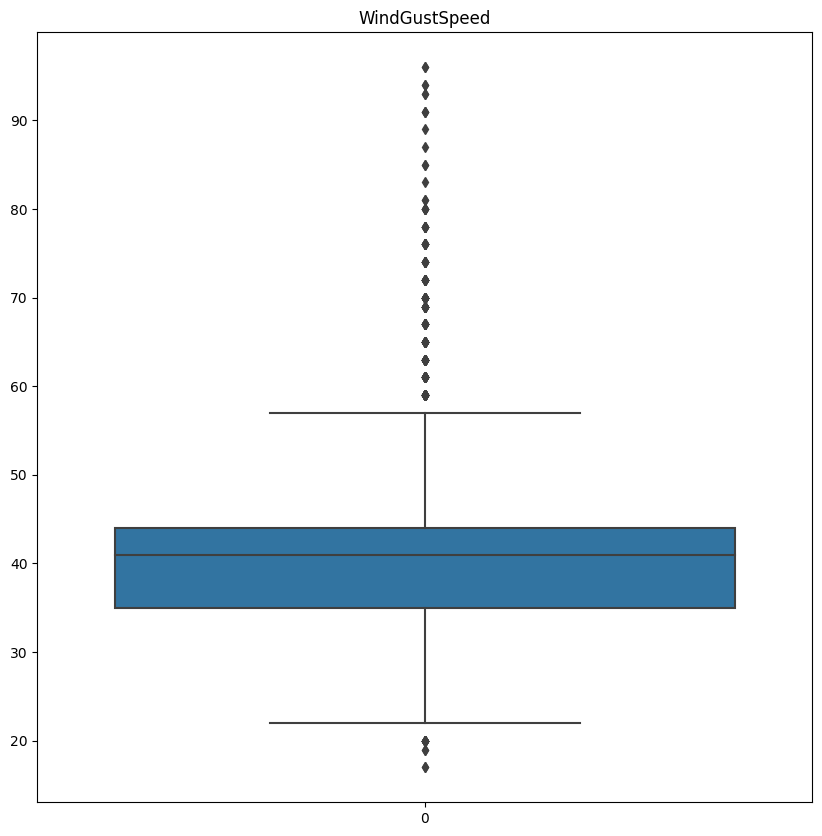

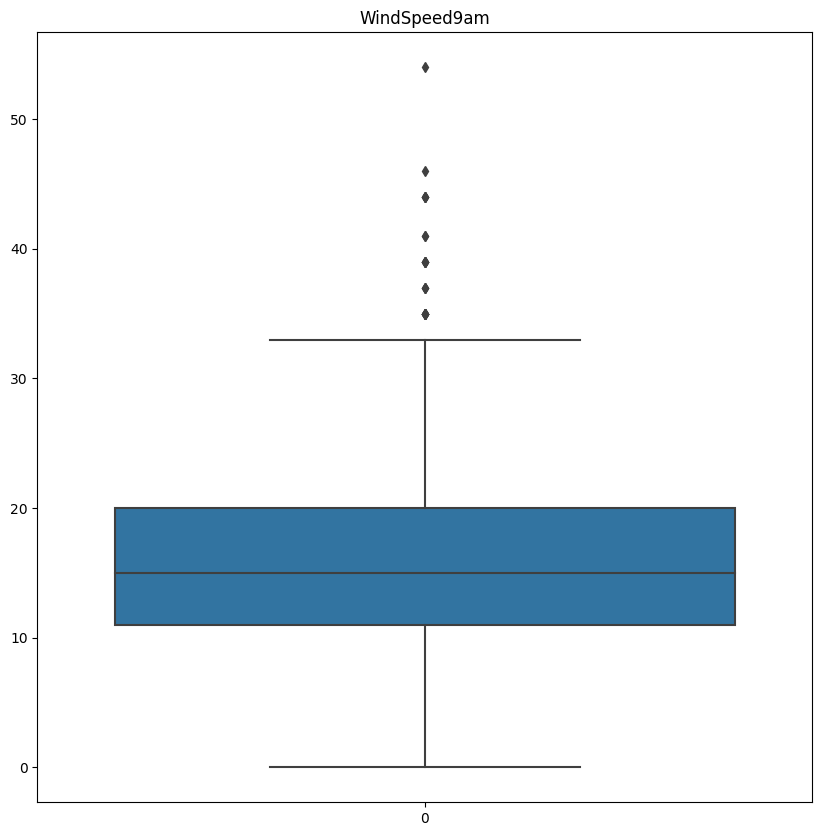

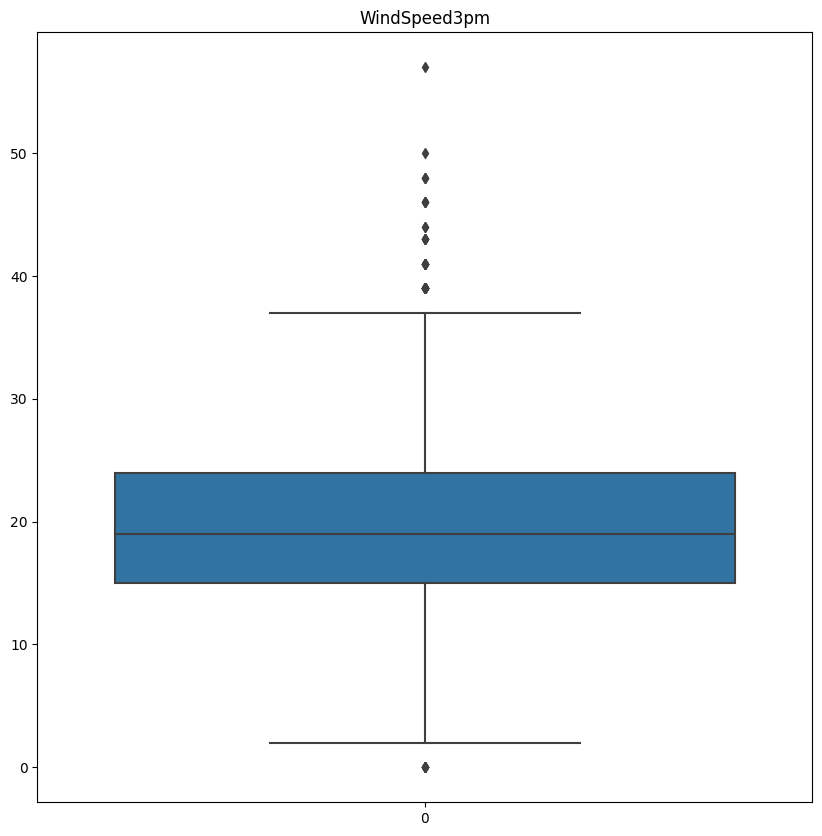

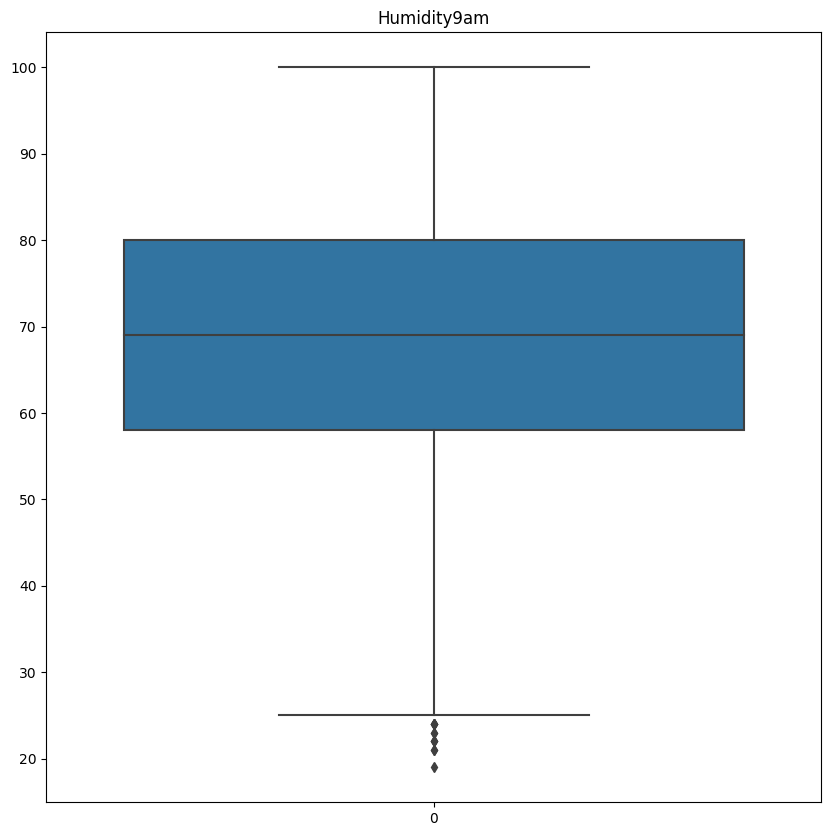

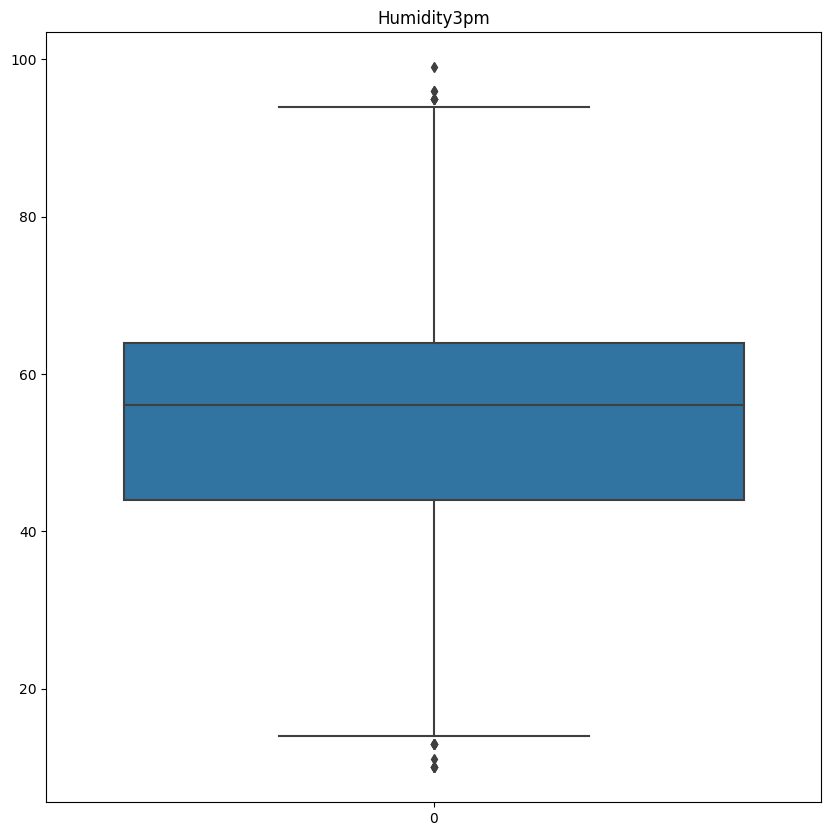

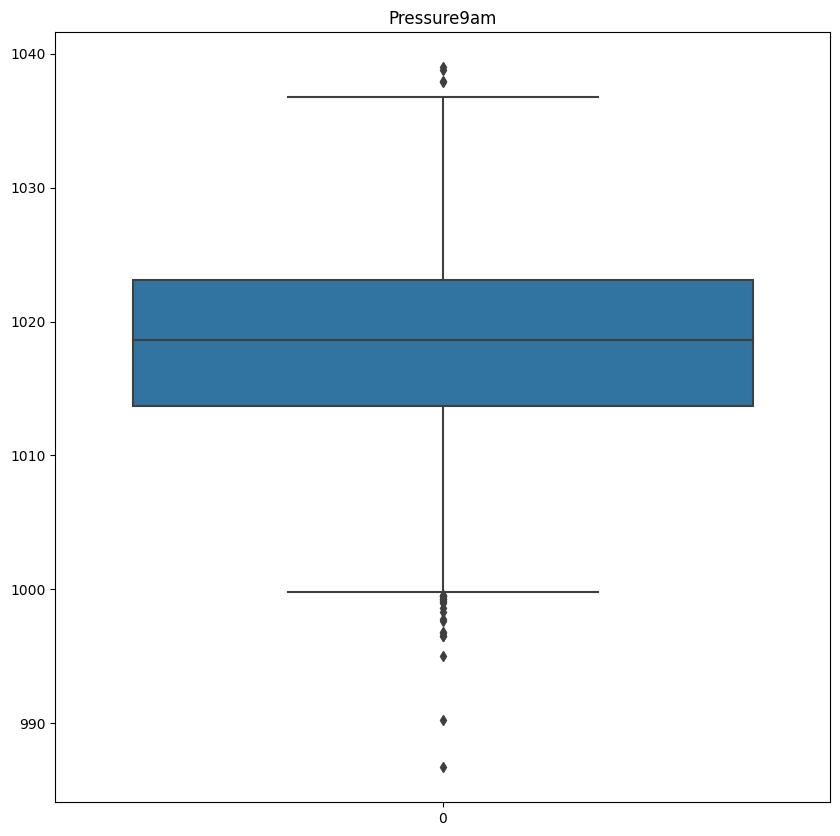

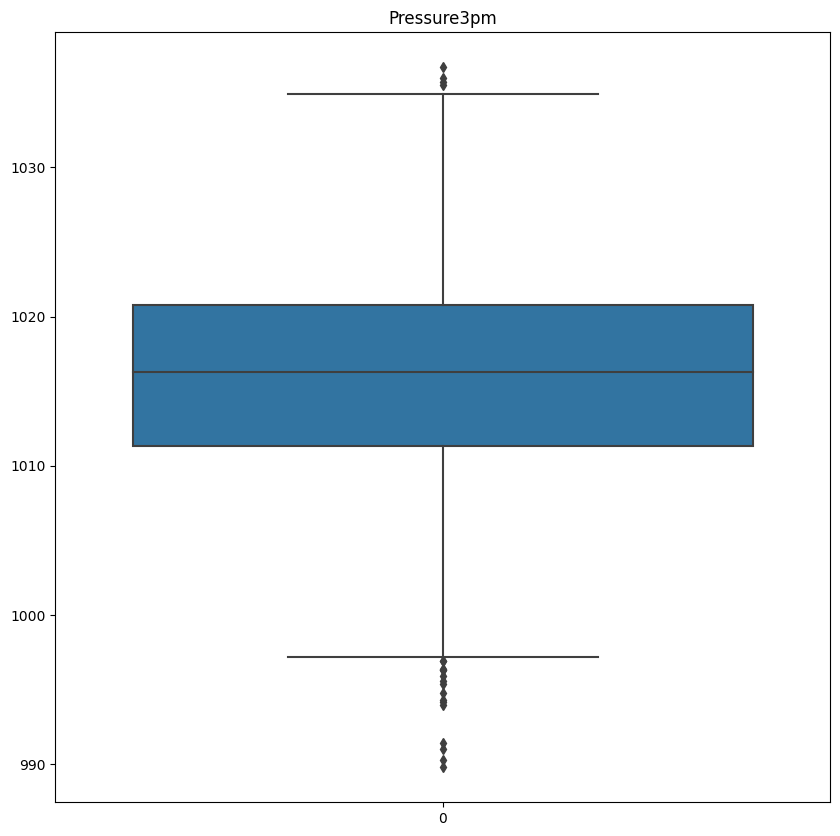

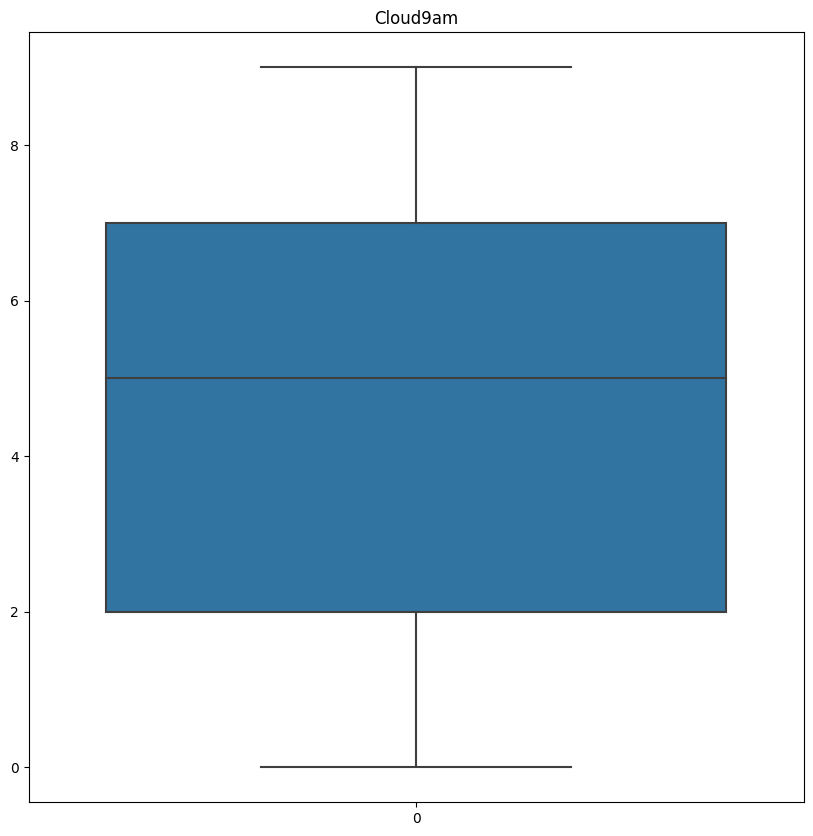

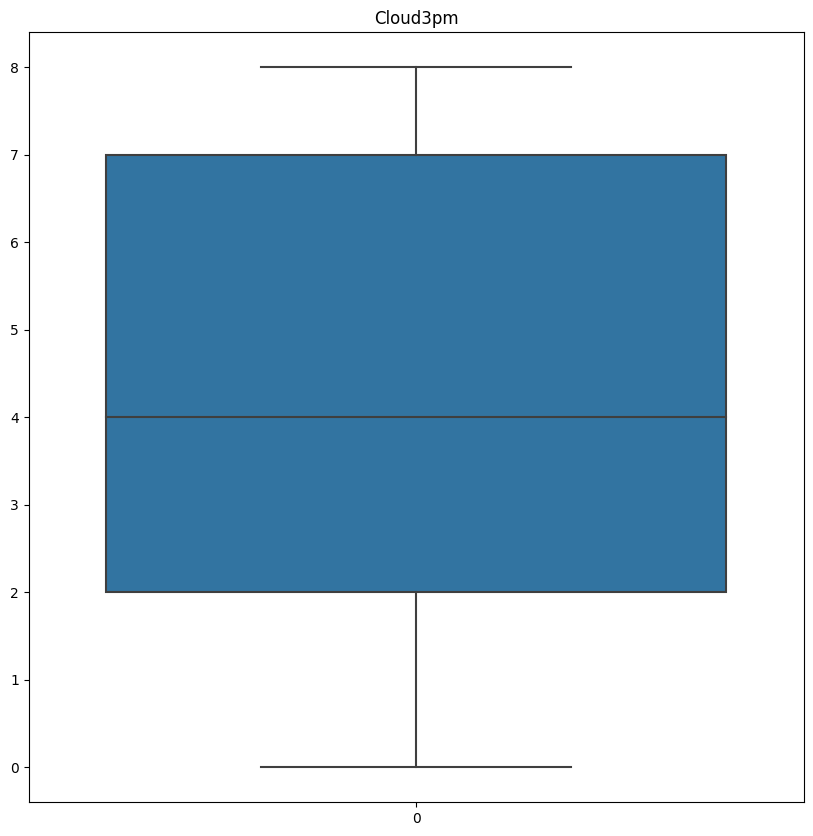

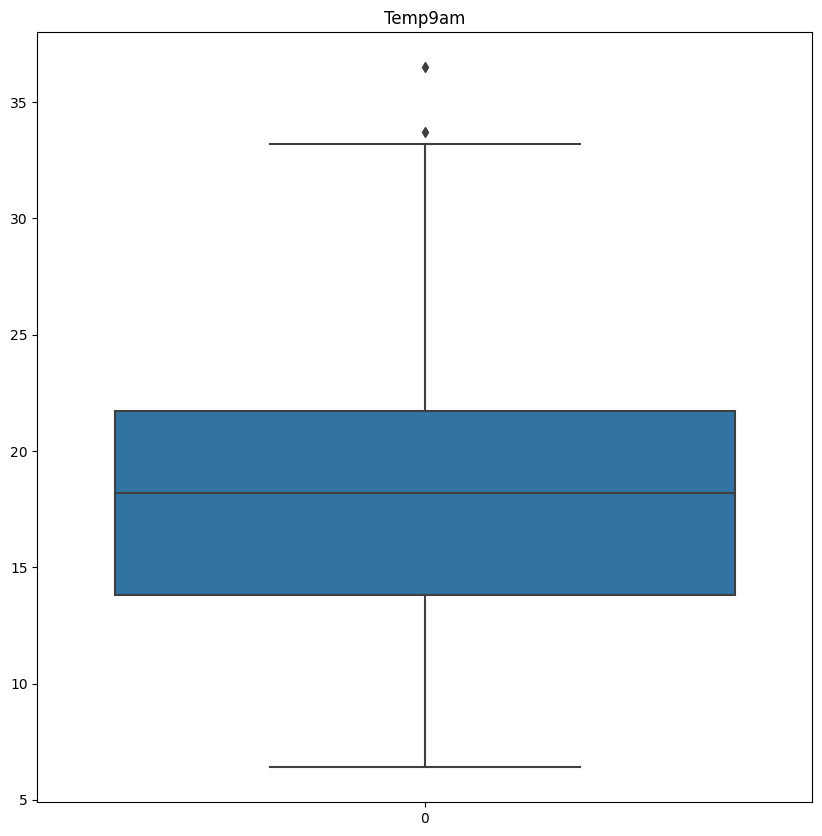

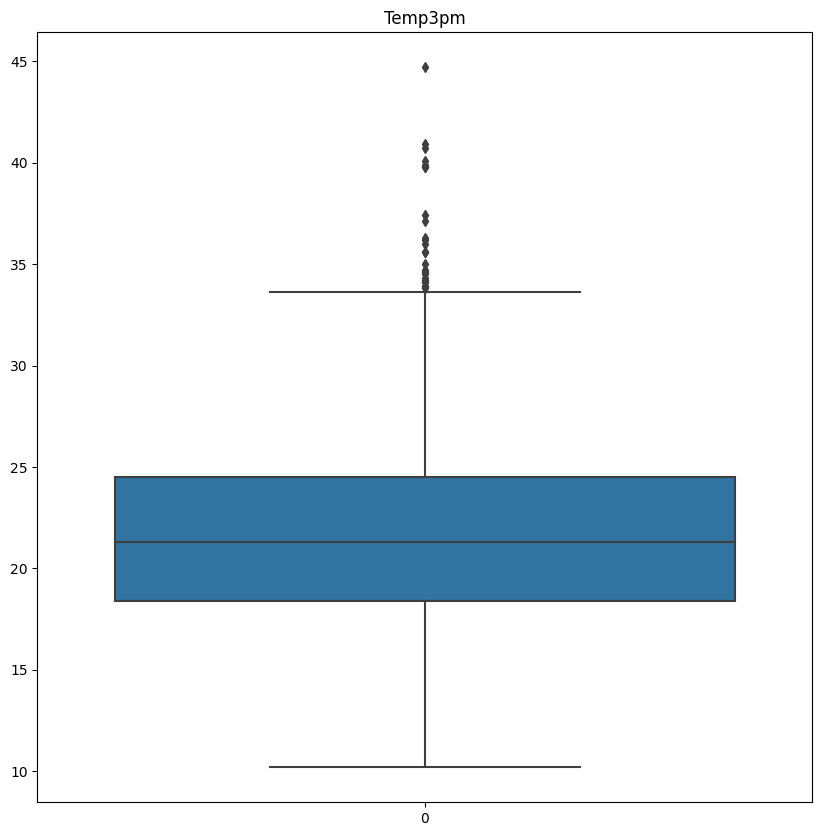

In [49]:
#checking for outliers using Box Plot:

for feature in numerical_features:
    plt.figure(figsize=(10,10))
    sns.boxplot(df[feature])
    plt.title(feature)

In [50]:
# checking for outliers using the statistical formulas:

df[numerical_features].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000
mean,14.877102,23.005564,3.342158,5.175787,7.168970,41.476307,15.077041,19.294405,68.243962,54.698563,1018.334424,1016.003085,4.318557,4.176093,17.821461,21.543656
std,4.554710,4.483752,9.917746,2.757684,3.815966,10.806951,7.043825,7.453331,15.086127,16.279241,7.020090,7.019915,2.526923,2.411274,4.894316,4.297053
min,4.300000,11.700000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.250000,35.000000,11.000000,15.000000,58.000000,44.000000,1013.700000,1011.300000,2.000000,2.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,41.000000,15.000000,19.000000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.800000,26.000000,1.400000,7.000000,10.200000,44.000000,20.000000,24.000000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,96.000000,54.000000,57.000000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'Evaporation'}>],
       [<AxesSubplot:title={'center':'Sunshine'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'WindSpeed9am'}>,
        <AxesSubplot:title={'center':'WindSpeed3pm'}>],
       [<AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>],
       [<AxesSubplot:title={'center':'Cloud9am'}>,
        <AxesSubplot:title={'center':'Cloud3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>,
        <AxesSubplot:title={'center':'Temp3pm'}>]], dtype=object)

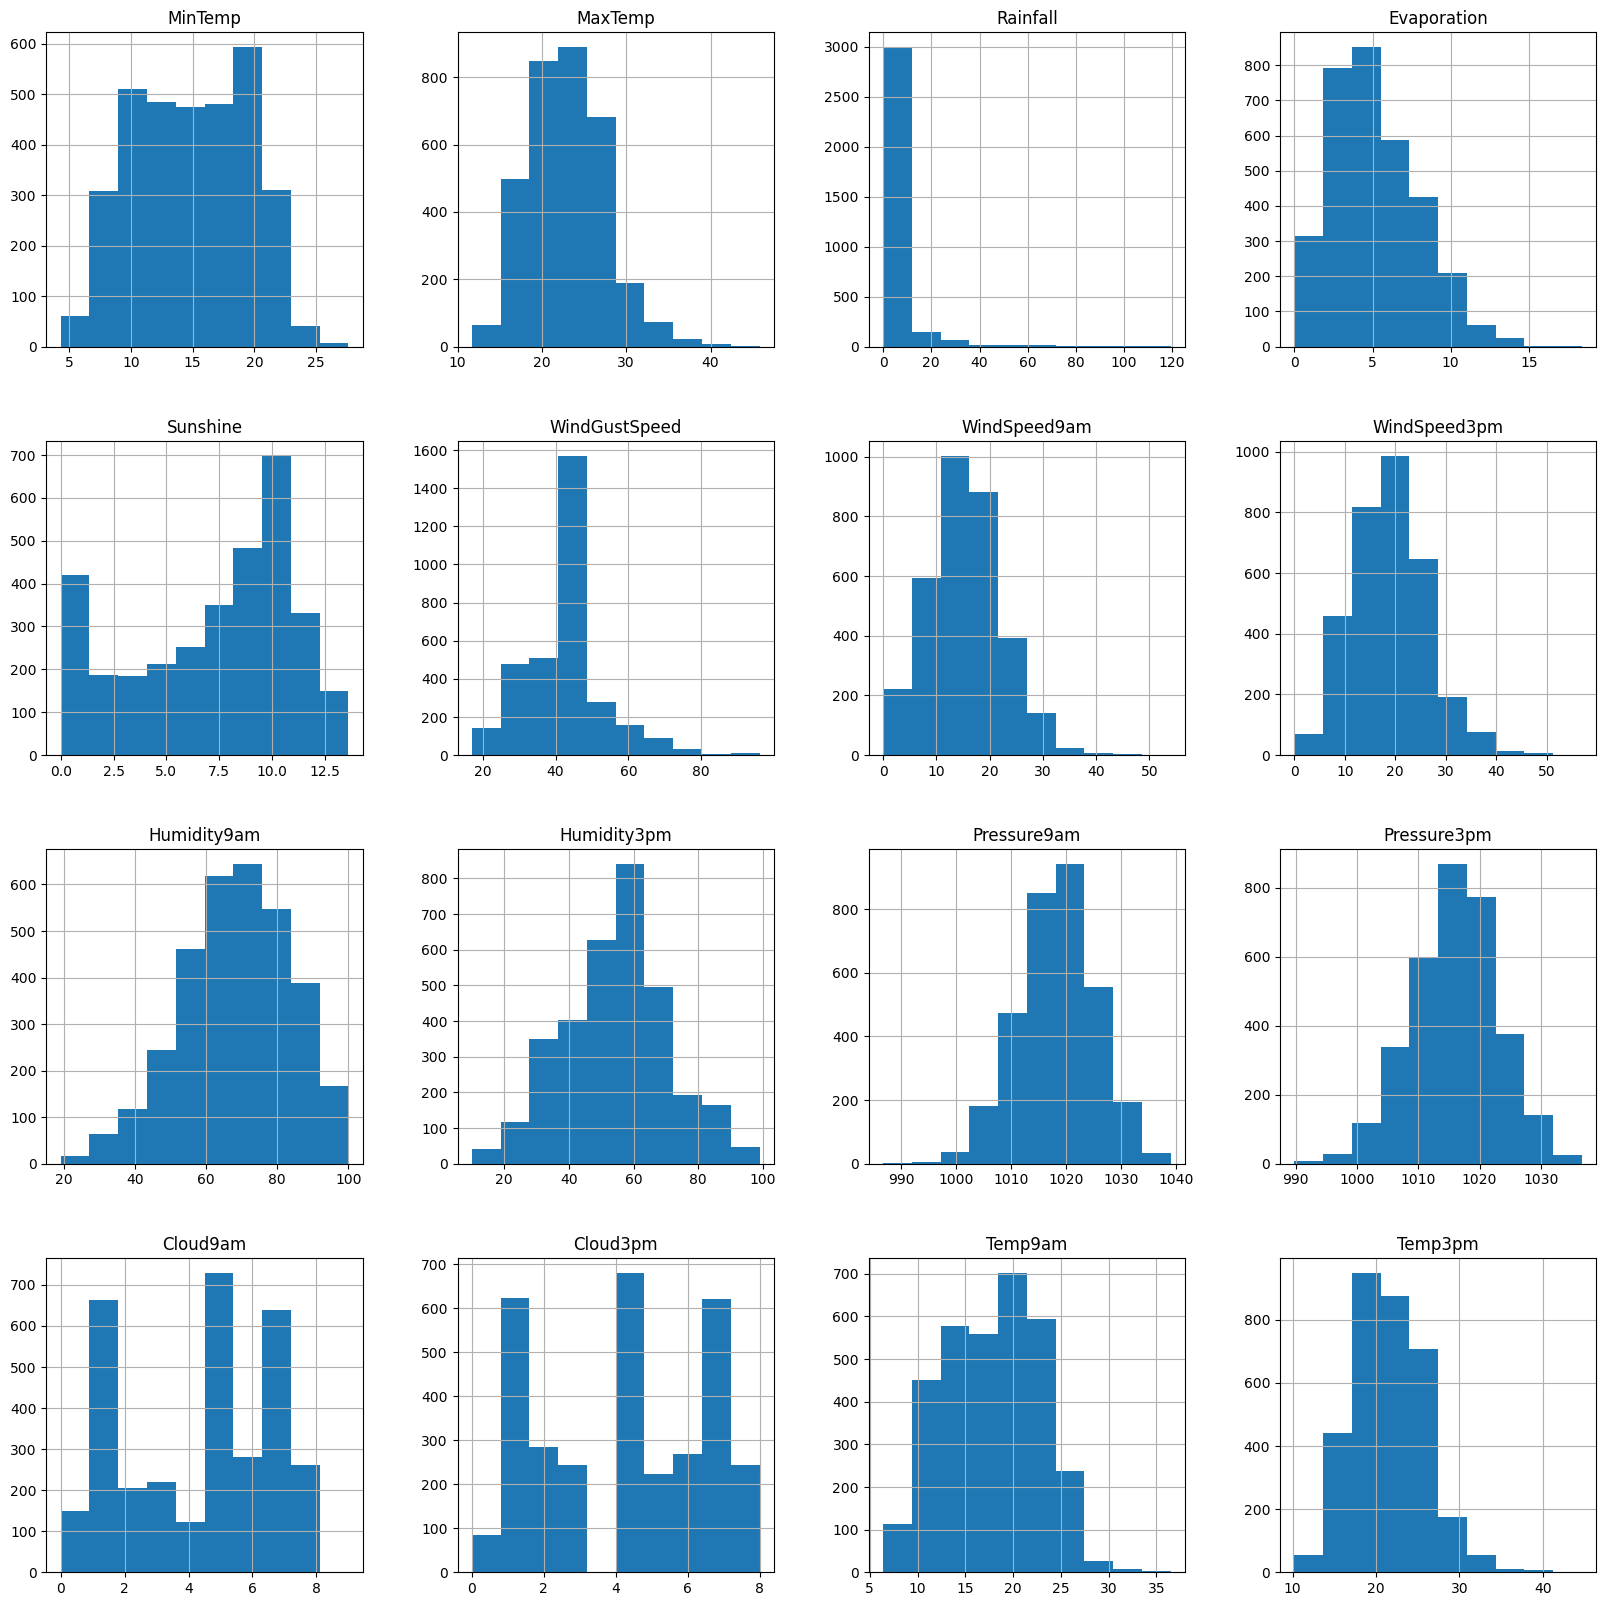

In [62]:
num_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
df_sydney_processed[num_features].hist(bins=10,figsize=(20,20))

### Training Data and Test Data


<AxesSubplot:>

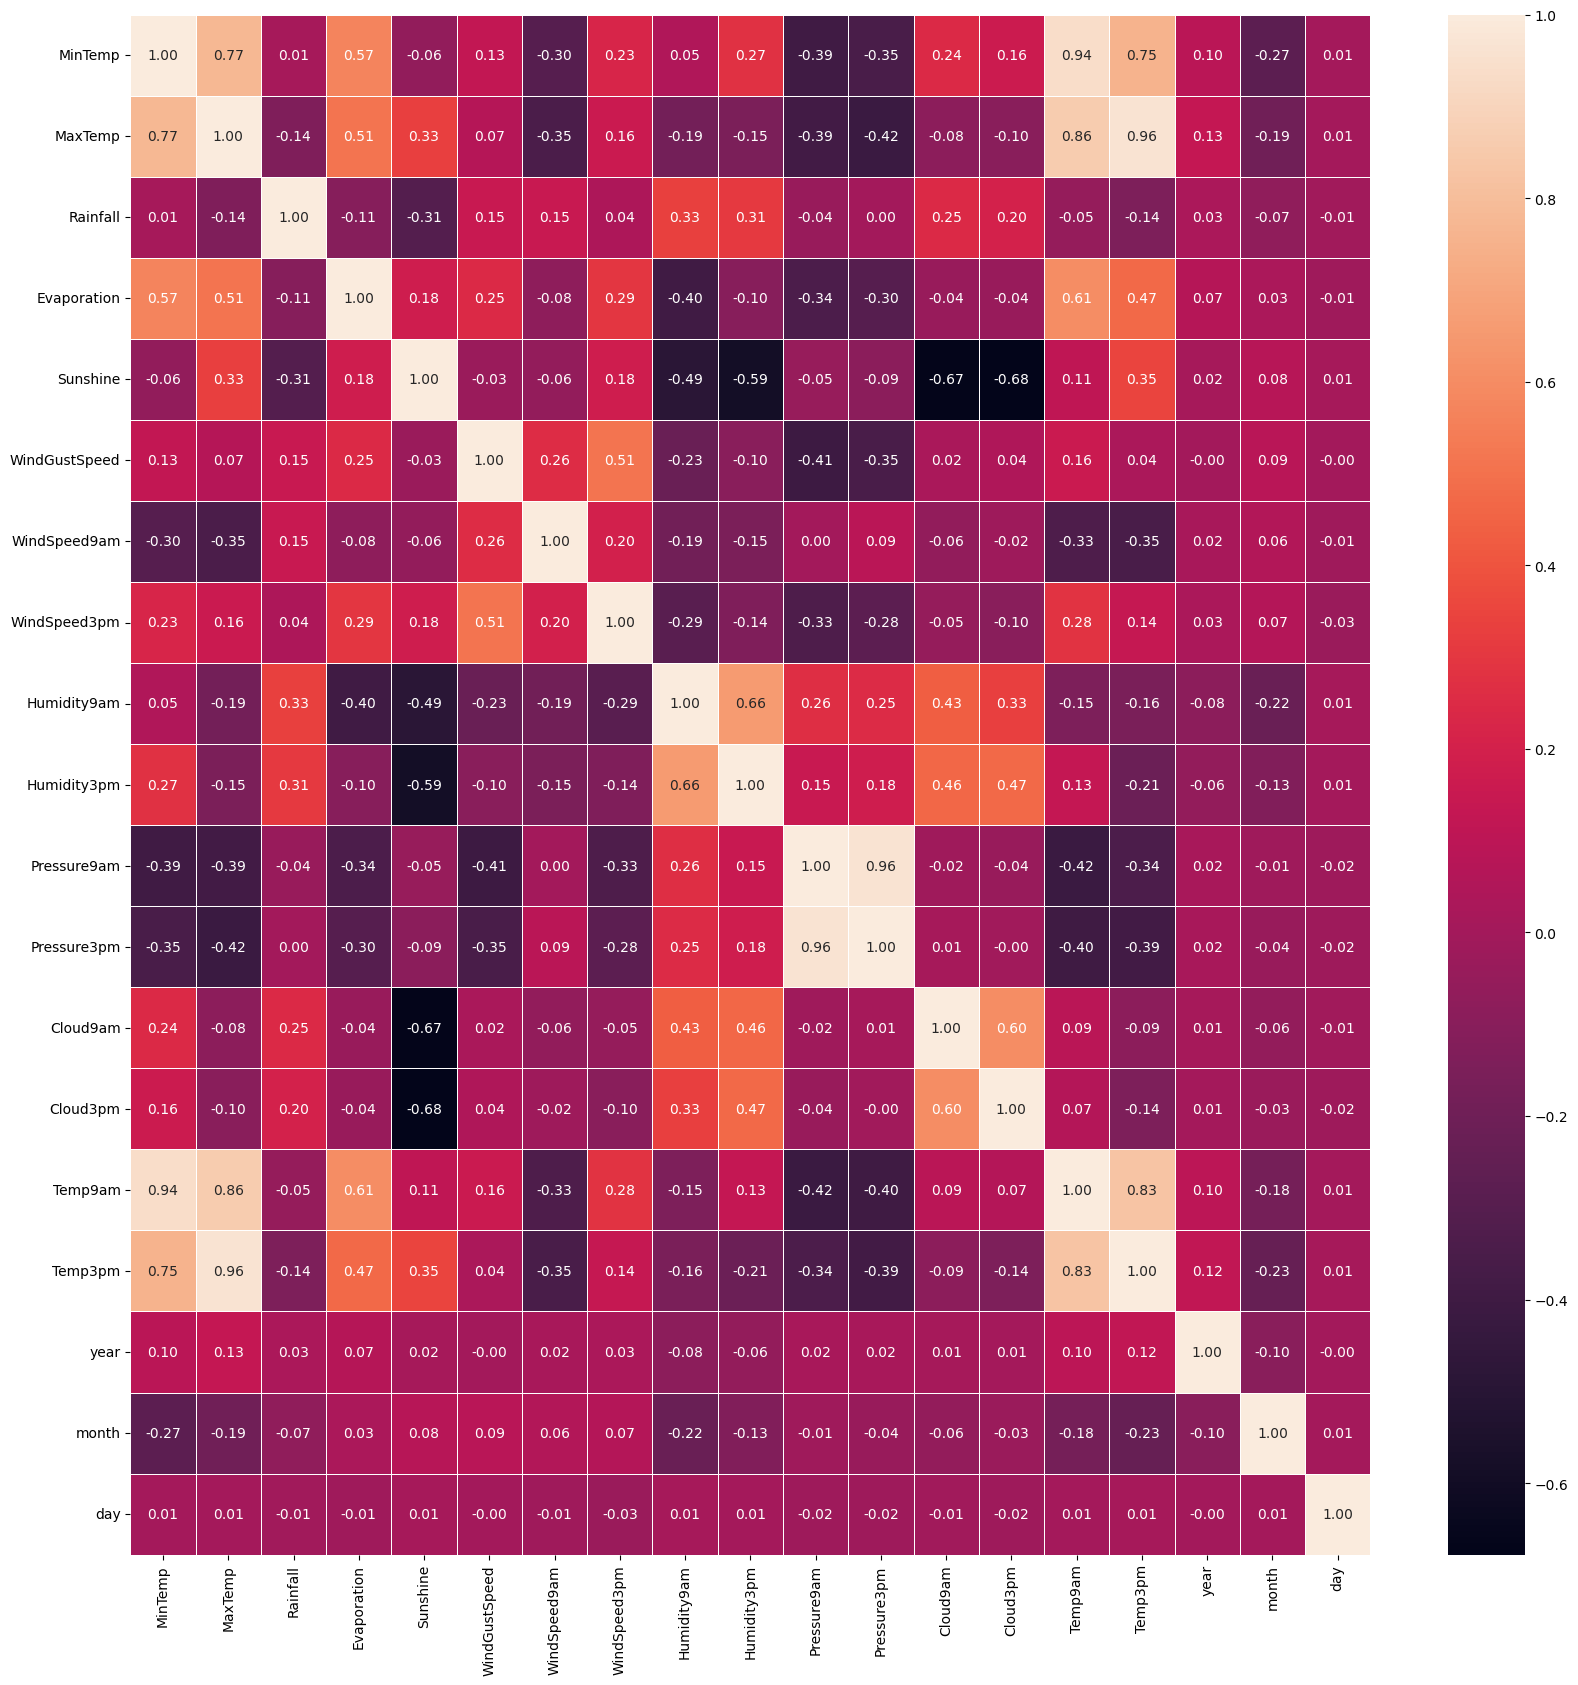

In [59]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),linewidths=0.5,annot=True,fmt=".2f")

<AxesSubplot:>

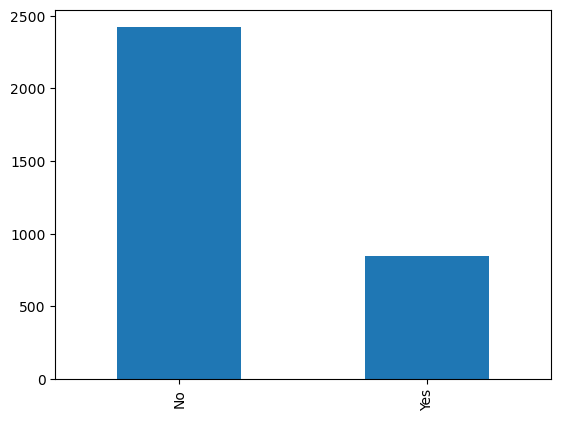

In [55]:
#Univariate analysis
df['RainTomorrow'].value_counts().plot(kind='bar')

Now, we set our 'features' or x values and our Y or target variable.


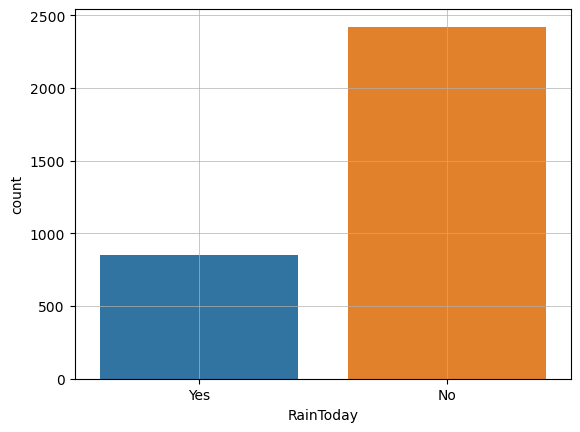

In [56]:
sns.countplot(data=df, x="RainToday")
plt.grid(linewidth = 0.5)
plt.show()

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

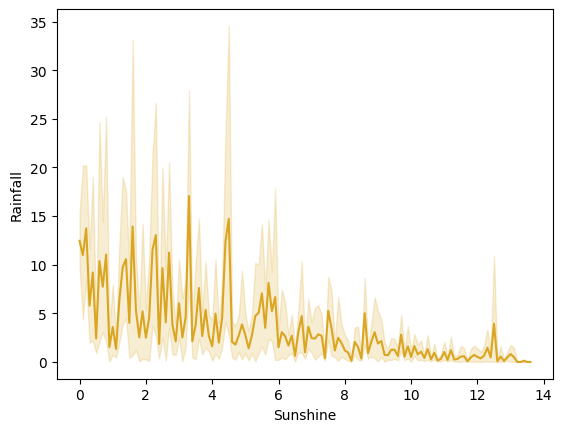

In [58]:
sns.lineplot(data=df,x='Sunshine',y='Rainfall',color='goldenrod')

In [61]:
df_sydney_processed = df_sydney_processed.astype(float)

In [64]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

### Linear Regression


#### Q1) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `10`.


In [ ]:
#Enter Your Code, Execute and take the Screenshot



In [65]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.20, random_state=10)
print ("train set:", x_train.shape, y_train.shape)
print ('test set:', x_test.shape, y_test.shape)

train set: (2616, 66) (2616,)
test set: (655, 66) (655,)


#### Q2) Create and train a Linear Regression model called LinearReg using the training data (`x_train`, `y_train`).


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [66]:
LinearReg = LinearRegression()
LinearReg.fit (x_train, y_train)
print ("co-efficient:", LinearReg.coef_)

co-efficient: [-2.36898597e-02  1.29940794e-02  7.28447952e-04  6.49240382e-03
 -3.51631991e-02  4.23792566e-03  1.82829608e-03  7.89765488e-04
  9.53916720e-04  8.56268440e-03  7.69456986e-03 -9.24129706e-03
 -8.87456290e-03  1.00485529e-02  1.44566610e-02 -3.45969933e-03
  2.56837450e+10  2.56837450e+10 -6.20590195e+09 -6.20590195e+09
 -6.20590195e+09 -6.20590195e+09 -6.20590195e+09 -6.20590195e+09
 -6.20590195e+09 -6.20590195e+09 -6.20590195e+09 -6.20590195e+09
 -6.20590195e+09 -6.20590195e+09 -6.20590195e+09 -6.20590195e+09
 -6.20590195e+09 -6.20590195e+09  1.15377956e+10  1.15377956e+10
  1.15377956e+10  1.15377956e+10  1.15377956e+10  1.15377956e+10
  1.15377956e+10  1.15377956e+10  1.15377956e+10  1.15377956e+10
  1.15377956e+10  1.15377956e+10  1.15377956e+10  1.15377956e+10
  1.15377956e+10  1.15377956e+10 -2.10745217e+09 -2.10745217e+09
 -2.10745217e+09 -2.10745217e+09 -2.10745217e+09 -2.10745217e+09
 -2.10745217e+09 -2.10745217e+09 -2.10745217e+09 -2.10745217e+09
 -2.1074521

#### Q3) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [68]:
predictions = LinearReg.predict(x_test)

#### Q4) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [69]:
from sklearn.metrics import r2_score
LinearRegression_MAE = np.mean (np.absolute(predictions-y_test))
LinearRegression_MSE = np.mean((predictions-y_test)**2)
LinearRegression_R2 = r2_score (y_test, predictions) 

print("Mean absolute error: %.2f" % LinearRegression_MAE)
print("Residual sum of squares (MSE): %.2f" % LinearRegression_MSE)
print("R2-score: %.2f" % LinearRegression_R2 )

Mean absolute error: 0.26
Residual sum of squares (MSE): 0.12
R2-score: 0.43


#### Q5) Show the MAE, MSE, and R2 in a tabular format using data frame for the linear model.


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [70]:
dict = {'error type': ['LinearRegression_MAE','LinearRegression_MSE', 'LinearRegression_R2'],
        'value': [LinearRegression_MAE,LinearRegression_MSE, LinearRegression_R2]}
Report = pd.DataFrame (dict)
Report

,error type,value
0,LinearRegression_MAE,0.256319
1,LinearRegression_MSE,0.115721
2,LinearRegression_R2,0.427129


### KNN


#### Q6) Create and train a KNN model called KNN using the training data (`x_train`, `y_train`) with the `n_neighbors` parameter set to `4`.


In [ ]:
#Enter Your Code Below, Execute, and Save the Screenshot of the Final Output

In [71]:
k = 4
KNN = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
KNN

KNeighborsClassifier(n_neighbors=4)

#### Q7) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [ ]:
#Enter Your Code Below, Execute, and Save the Screenshot of the Final Output

In [72]:
predictions = KNN.predict (x_test)

#### Q8) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [ ]:
#Enter Your Code Below, Execute, and Save the Screenshot of the Final Output

In [73]:
KNN_Accuracy_Score = metrics.accuracy_score (y_test, predictions)
KNN_JaccardIndex = metrics.jaccard_score (y_test, predictions)
KNN_F1_Score = metrics.f1_score (y_test, predictions)
print("KNN Accuracy Score: ",KNN_Accuracy_Score)
print("KNN_JaccardIndex: ",KNN_JaccardIndex)
print("KNN F1 score : ", KNN_F1_Score)


KNN Accuracy Score:  0.8183206106870229
KNN_JaccardIndex:  0.4251207729468599
KNN F1 score :  0.5966101694915255


### Decision Tree


#### Q9) Create and train a Decision Tree model called Tree using the training data (`x_train`, `y_train`).


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [74]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

#### Q10) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [75]:
predictions = Tree.predict (x_test)

#### Q11) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [76]:
Tree_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
Tree_JaccardIndex = metrics.jaccard_score(y_test, predictions)
Tree_F1_Score = metrics.f1_score(y_test, predictions)
print("Tree accur_acy score: ", Tree_Accuracy_Score)
print("Tree JaccardIndex : ", Tree_JaccardIndex)
print("Tree_F1_Score : ", Tree_F1_Score)


Tree accur_acy score:  0.8183206106870229
Tree JaccardIndex :  0.48034934497816595
Tree_F1_Score :  0.6489675516224188


### Logistic Regression


#### Q12) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `1`.


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [77]:
x_train, x_test, y_train, y_test = train_test_split (features, Y, test_size =0.2, random_state=1)

#### Q13) Create and train a LogisticRegression model called LR using the training data (`x_train`, `y_train`) with the `solver` parameter set to `liblinear`.


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [78]:
LR = LogisticRegression (C=0.01, solver='liblinear').fit (x_train, y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

#### Q14) Now, use the `predict` and `predict_proba` methods on the testing data (`x_test`) and save it as 2 arrays `predictions` and `predict_proba`.


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [79]:
predictions = LR.predict(x_test)

In [80]:
predict_proba = LR.predict_proba(x_test)

#### Q15) Using the `predictions`, `predict_proba` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [81]:
LR_Accuracy_Score = metrics.accuracy_score(y_test,predictions)
LR_JaccardIndex = metrics.jaccard_score(y_test,predictions)
LR_F1_Score = metrics.f1_score(y_test,predictions)
LR_Log_Loss = metrics.log_loss(y_test, predictions)
print("LR accuracy score: ", LR_Accuracy_Score)
print("LR JaccardIndex : ", LR_JaccardIndex)
print("LR F1 Score : ", LR_F1_Score)
print("LR Log Loss : ", LR_Log_Loss)

LR accuracy score:  0.8274809160305343
LR JaccardIndex :  0.4840182648401826
LR F1 Score :  0.6523076923076923
LR Log Loss :  6.218218065603417


### SVM


#### Q16) Create and train a SVM model called SVM using the training data (`x_train`, `y_train`).


In [ ]:
#Enter Your Code Below, Execute, and Save the Screenshot of the Final Output

In [82]:
SVM = svm.SVC (kernel='linear')
SVM.fit (x_train, y_train)

SVC(kernel='linear')

#### Q17) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [ ]:
#Enter Your Code Below, Execute, and Save the Screenshot of the Final Output

In [83]:
predictions = SVM.predict (x_test)

#### Q18) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [84]:
SVM_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
SVM_JaccardIndex = metrics.jaccard_score(y_test, predictions)
SVM_F1_Score = metrics.f1_score(y_test, predictions)
print("SVM accuracy score : ", SVM_Accuracy_Score)
print("SVM jaccardIndex : ", SVM_JaccardIndex)
print("SVM F1_score : ", SVM_F1_Score)


SVM accuracy score :  0.833587786259542
SVM jaccardIndex :  0.49537037037037035
SVM F1_score :  0.6625386996904025


### Report


#### Q19) Show the Accuracy,Jaccard Index,F1-Score and LogLoss in a tabular format using data frame for all of the above models.

\*LogLoss is only for Logistic Regression Model


In [85]:
final_dict = {'Accuracy':[KNN_Accuracy_Score,Tree_Accuracy_Score,LR_Accuracy_Score,SVM_Accuracy_Score], 
              'Jaccard Index':[KNN_JaccardIndex,Tree_JaccardIndex,LR_JaccardIndex,SVM_JaccardIndex], 
              'F1 Score':[KNN_F1_Score,Tree_F1_Score,LR_F1_Score,SVM_F1_Score],
              'LogLoss':['N/A','N/A',LR_Log_Loss,'N/A']
             }
labels = ['KNN','Decision Tree','Logistic Regression','SVM']
Results = pd.DataFrame(final_dict,index=labels)
Results

,Accuracy,Jaccard Index,F1 Score,LogLoss
KNN,0.818321,0.425121,0.596610,N/A
Decision Tree,0.818321,0.480349,0.648968,N/A
Logistic Regression,0.827481,0.484018,0.652308,6.218218
SVM,0.833588,0.495370,0.662539,N/A


In [89]:
#CONCLUSION: All models showed similar accuracy